In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import numpy as np

In [ ]:
from sklearn.datasets import fetch_openml
mnist_data = fetch_openml(data_id=554)

/usr/local/lib/python3.10/dist-packages/sklearn/datasets/_openml.py:968: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


***Ques 01.***

In [ ]:
X, y = mnist_data.data, mnist_data.target

In [ ]:
# Convert data and labels to numpy arrays
X = X.to_numpy().astype(float)
y = y.to_numpy().astype(int)

In [ ]:
# Create a binary label: 1 for lucky (3, 7, 8) and 0 for unlucky
y_binary = np.where((y == 3) | (y == 7) | (y == 8), 1, 0)

In [ ]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y_binary, test_size=0.2, random_state=42)

In [ ]:
# Standardize the data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
class LogisticRegression(nn.Module):
    def __init__(self, input_size):
        super(LogisticRegression, self).__init__()
        self.linear = nn.Linear(input_size, 1)

    def forward(self, x):
        out = torch.sigmoid(self.linear(x))
        return out

In [ ]:
input_size = X_train.shape[1]
model = LogisticRegression(input_size)

In [ ]:
criterion = nn.BCELoss()
optimizer = optim.SGD(model.parameters(), lr=0.01)


In [ ]:
num_epochs = 1000

for epoch in range(num_epochs):
    inputs = torch.from_numpy(X_train).float()
    labels = torch.from_numpy(y_train).float()

    # Forward pass
    outputs = model(inputs)
    loss = criterion(outputs, labels.view(-1, 1))

    # Backward pass and optimization
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    if (epoch + 1) % 100 == 0:
        print(f'Epoch [{epoch + 1}/{num_epochs}], Loss: {loss.item():.4f}')

print("Training complete")


Epoch [100/1000], Loss: 0.4270
Epoch [200/1000], Loss: 0.3860
Epoch [300/1000], Loss: 0.3643
Epoch [400/1000], Loss: 0.3501
Epoch [500/1000], Loss: 0.3399
Epoch [600/1000], Loss: 0.3322
Epoch [700/1000], Loss: 0.3262
Epoch [800/1000], Loss: 0.3214
Epoch [900/1000], Loss: 0.3175
Epoch [1000/1000], Loss: 0.3142
Training complete


In [ ]:
model.eval()
with torch.no_grad():
    test_inputs = torch.from_numpy(X_test).float()
    test_labels = torch.from_numpy(y_test).float()

    # Predict
    predictions = model(test_inputs)
    predictions = (predictions > 0.5).float()

    # Calculate accuracy
    accuracy = (predictions == test_labels.view(-1, 1)).sum().item() / len(test_labels)
    print(f"Test Accuracy: {accuracy:.4f}")


Test Accuracy: 0.8747


**Model Analysis**
- import the libraries and reprocess the loaded data
- define the logistic regression model, loss and optimizer function using neyral network
- Train & test the model based on labels

**Analysis**
- The model has an accuracy of 87% with imbalanced data using logistic regression
- The model does not perform qually well on all three lucky numbers because of imbalacing of datapoints in our datasets. There might more datapoints of one specific lucky number compared to the other two.

***Ques 02.***

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, f1_score, roc_curve, roc_auc_score

In [ ]:
knn_model = KNeighborsClassifier(n_neighbors=5)  # You can adjust the number of neighbors as needed

In [ ]:
# Fit the model to the training data
knn_model.fit(X_train, y_train)

KNeighborsClassifier()

In [ ]:
y_pred = knn_model.predict(X_test)

In [ ]:
accuracy = accuracy_score(y_test, y_pred)
print(f"Test Accuracy: {accuracy:.4f}")

Test Accuracy: 0.9709


**Analysis**
- I used KNN model to predict my datapoint labels
- The accuracy for this model turned out to be 97% with imbalanced data

**Qued 2 (a)**

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
# For Logistic Regression model
predictions_lr = model(test_inputs)
predictions_lr = (predictions_lr > 0.5).float()
accuracy_lr = accuracy_score(y_test, predictions_lr)
f1_lr = f1_score(y_test, predictions_lr)
fpr_lr, tpr_lr, _ = roc_curve(y_test, predictions_lr)
roc_auc_lr = roc_auc_score(y_test, predictions_lr)

In [ ]:
# Print and compare the metrics
print("Logistic Regression:")
print(f"Accuracy: {accuracy_lr:.4f}")
print(f"F1 Score: {f1_lr:.4f}")
print(f"ROC AUC: {roc_auc_lr:.4f}")

Logistic Regression:
Accuracy: 0.8747
F1 Score: 0.7967
ROC AUC: 0.8540


In [ ]:
# For KNN model
y_pred_knn = knn_model.predict(X_test)
accuracy_knn = accuracy_score(y_test, y_pred)
f1_knn = f1_score(y_test, y_pred)
fpr, tpr, _ = roc_curve(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred)

In [ ]:
print("\nKNN:")
print(f"Accuracy: {accuracy:.4f}")
print(f"F1 Score: {f1_knn:.4f}")
print(f"ROC AUC: {roc_auc:.4f}")


KNN:
Accuracy: 0.9709
F1 Score: 0.9520
ROC AUC: 0.9626


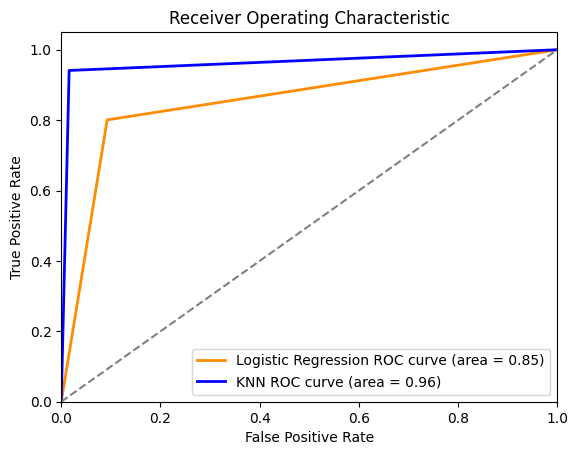

In [ ]:
# Plot ROC curves
plt.figure()
plt.plot(fpr_lr, tpr_lr, color='darkorange', lw=2, label='Logistic Regression ROC curve (area = {:.2f})'.format(roc_auc_lr))
plt.plot(fpr, tpr, color='blue', lw=2, label='KNN ROC curve (area = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc='lower right')
plt.show()


**Analysis**
- Although the complex nature of logistic regression, KNN still outperforms it by a lot since complexity can define more features precisely but it doesn't mean, it's a better analysis method.

**Que 2 Extra Credit**<br>
Using SVM technique for our predictions

In [ ]:
from sklearn.svm import SVC

In [ ]:
svm_model = SVC(kernel='linear', C=1.0)  # You can try different kernels and hyperparameters

# Fit the model to the training data
svm_model.fit(X_train, y_train)

In [ ]:
y_pred_svm = svm_model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred_svm)
print(f"Test Accuracy: {accuracy:.4f}")

**Analysis**
- This model is still comparable with Logistic Regression approach, resulting in the clear verdict of complexity vs perfromance trade off lying in a gray area.

***Ques 03.***

In [ ]:
class NeuralNetwork(nn.Module):
    def __init__(self, input_size, hidden_size, num_classes):
        super(NeuralNetwork, self).__init__()
        self.fc1 = nn.Linear(input_size, hidden_size)
        self.relu = nn.ReLU()
        self.fc2 = nn.Linear(hidden_size, num_classes)

    def forward(self, x):
        out = self.fc1(x)
        out = self.relu(out)
        out = self.fc2(out)
        return out


In [ ]:
input_size = X_train.shape[1]
hidden_size = 128
num_classes = 10  # There are 10 classes (digits 0-9)

In [ ]:
model = NeuralNetwork(input_size, hidden_size, num_classes)

In [ ]:
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.01)

In [ ]:
num_epochs = 100

for epoch in range(num_epochs):
    inputs = torch.from_numpy(X_train).float()
    labels = torch.from_numpy(y_train).long()

    # Forward pass
    outputs = model(inputs)
    loss = criterion(outputs, labels)

    # Backward pass and optimization
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    if (epoch + 1) % 10 == 0:
        print(f'Epoch [{epoch + 1}/{num_epochs}], Loss: {loss.item():.4f}')

print("Training complete")

Epoch [10/100], Loss: 0.3707
Epoch [20/100], Loss: 0.1831
Epoch [30/100], Loss: 0.1148
Epoch [40/100], Loss: 0.0877
Epoch [50/100], Loss: 0.0725
Epoch [60/100], Loss: 0.0623
Epoch [70/100], Loss: 0.0541
Epoch [80/100], Loss: 0.0470
Epoch [90/100], Loss: 0.0408
Epoch [100/100], Loss: 0.0352
Training complete


In [ ]:
model.eval()
with torch.no_grad():
    test_inputs = torch.from_numpy(X_test).float()
    test_labels = torch.from_numpy(y_test).long()

    # Predict
    outputs = model(test_inputs)
    _, predicted = torch.max(outputs, 1)

    # Calculate accuracy
    accuracy = (predicted == test_labels).sum().item() / len(test_labels)
    print(f"Test Accuracy: {accuracy:.4f}")


Test Accuracy: 0.9696


**Analysis**
- The neural network consists of two fully connected (dense) layers.
- The first layer (fc1) has input_size input features and hidden_size output features with a ReLU activation function.
- The second layer (fc2) has hidden_size input features and num_classes output features, which correspond to the 10 classes (digits 0-9).
- Cross-entropy loss is used as the loss function, and the Adam optimizer is employed for training.
- My neural network model has an accuracy of ~97% with 100 epochs and other above chose hyperparameters such as 0.01 learning rate.

***Ques 04.**

**Part A.**

In [ ]:
import torchvision

In [ ]:
# Set the model to evaluation mode
model.eval()

NeuralNetwork(
  (fc1): Linear(in_features=784, out_features=128, bias=True)
  (relu): ReLU()
  (fc2): Linear(in_features=128, out_features=10, bias=True)
)

In [ ]:
# Convert the test data to PyTorch tensors
test_inputs = torch.from_numpy(X_test).float()

In [ ]:
# Make predictions
with torch.no_grad():
    outputs = model(test_inputs)
    probabilities, predicted = torch.max(torch.nn.functional.softmax(outputs, dim=1), 1)

In [ ]:
# Create a dictionary to store the most confident predictions for each digit
most_confident_samples = {digit: None for digit in range(10)}
highest_confidence = [-1.0] * 10

In [ ]:
# Iterate through the test set and find the most confident predictions for each digit
for i in range(len(test_inputs)):
    confidence = probabilities[i].item()
    if confidence > highest_confidence[predicted[i].item()]:
        highest_confidence[predicted[i].item()] = confidence
        most_confident_samples[predicted[i].item()] = test_inputs[i]

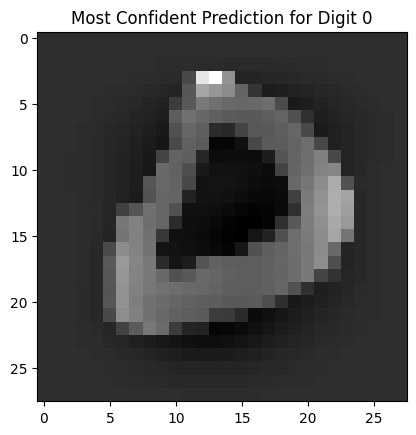

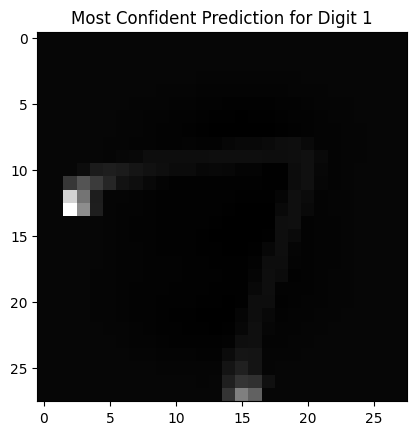

No confident prediction found for digit 2
No confident prediction found for digit 3
No confident prediction found for digit 4
No confident prediction found for digit 5
No confident prediction found for digit 6
No confident prediction found for digit 7
No confident prediction found for digit 8
No confident prediction found for digit 9


In [ ]:
# Display the most confident predictions
for digit, sample in most_confident_samples.items():
    if sample is not None:
      plt.figure()
      plt.title(f"Most Confident Prediction for Digit {digit}")
      sample = sample.view(28, 28)  # Reshape to the original image size
      plt.imshow(sample.numpy(), cmap='gray')
      plt.show()
    else:
        print(f"No confident prediction found for digit {digit}")

**Part B.**

In [ ]:
from sklearn.metrics import confusion_matrix

In [ ]:
# Convert the PyTorch tensor predictions to numpy arrays
y_pred = predicted.numpy()
y_true = y_test

In [ ]:
# Create the confusion matrix
conf_matrix = confusion_matrix(y_true, y_pred)

In [ ]:
# Display the confusion matrix
print("Confusion Matrix:")
print(conf_matrix)

Confusion Matrix:
[[9518  189]
 [ 237 4056]]


In [ ]:
# Find the five most common misclassifications
misclassified_indices = np.where(y_pred != y_true)[0]
misclassification_count = {}

In [ ]:
for idx in misclassified_indices:
    true_label = y_true[idx]
    predicted_label = y_pred[idx]
    key = (true_label, predicted_label)
    misclassification_count[key] = misclassification_count.get(key, 0) + 1

In [ ]:
sorted_misclassifications = sorted(misclassification_count.items(), key=lambda x: x[1], reverse=True)


Misclassification 1 (True Label: 1, Predicted Label: 0, Count: 237):


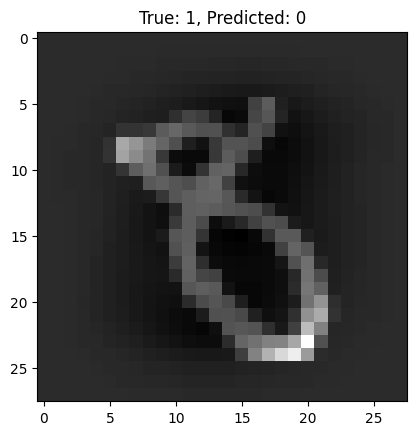

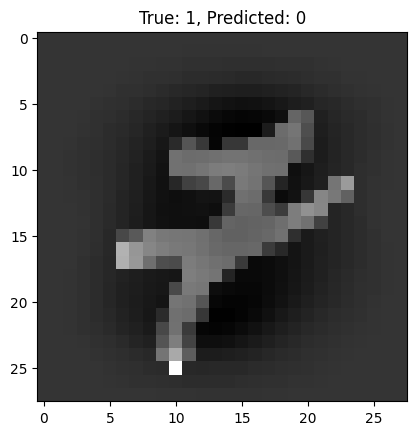

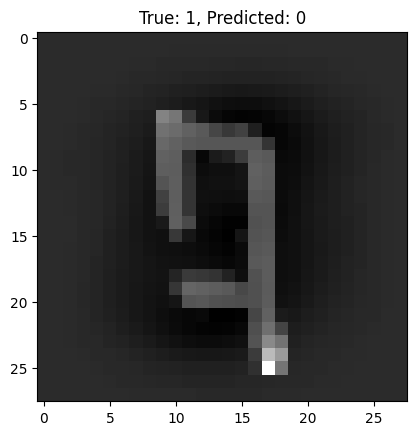


Misclassification 2 (True Label: 0, Predicted Label: 1, Count: 189):


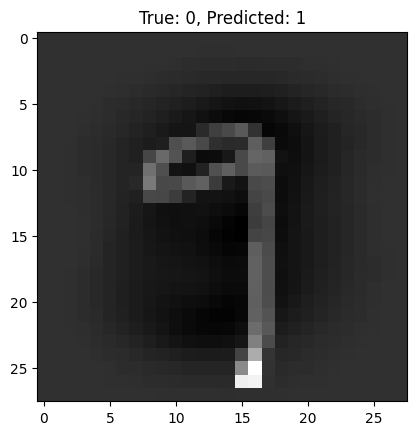

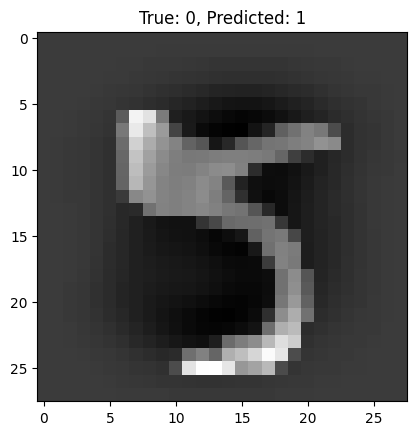

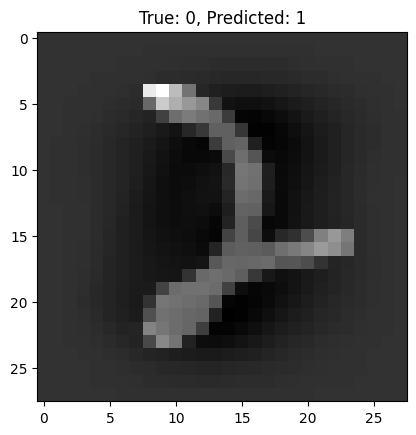

In [ ]:
# Display examples of misclassified digits for the five most common cases
for i, (misclassified_case, count) in enumerate(sorted_misclassifications[:5]):
    true_label, predicted_label = misclassified_case
    indices = np.where((y_true == true_label) & (y_pred == predicted_label))[0]

    print(f"\nMisclassification {i + 1} (True Label: {true_label}, Predicted Label: {predicted_label}, Count: {count}):")
    for idx in indices[:3]:  # Display up to 3 examples for each case
        plt.figure()
        plt.title(f"True: {true_label}, Predicted: {predicted_label}")
        sample = X_test[idx].reshape(28, 28)
        plt.imshow(sample, cmap='gray')
        plt.show()


**Analysis**

**Part C. - Extra Credit**

In [ ]:
pip install gradio

In [ ]:
!pip install typing-extensions --upgrade

In [ ]:
!pip install gradio --upgrade


In [ ]:
# import gradio as gr
import torchvision.transforms as transforms
from PIL import Image

In [ ]:
# Load the trained model
model = torch.load(knn_model)
model.eval()

In [ ]:
# Define the preprocessing function
def preprocess(image):
    image = Image.fromarray(image)
    transform = transforms.Compose([
        transforms.Grayscale(num_output_channels=1),
        transforms.Resize((28, 28)),
        transforms.ToTensor(),
    ])
    image = transform(image)
    image = 1 - image  # Invert black and white
    return image

In [ ]:
# Define the prediction function
def predict(image):
    image = preprocess(image)
    image = image.unsqueeze(0)  # Add batch dimension
    with torch.no_grad():
        outputs = model(image)
        _, predicted = torch.max(outputs, 1)
    return int(predicted)


In [ ]:
# Create the Gradio interface
iface = gr.Interface(
    fn=predict,
    inputs="sketchpad",
    outputs="number",
    live=True,
    capture_session=True,
)

iface.launch()

**Analysis:** <br>
*Capabilities:*<br>
- The model is capable of classifying digits into one of the 10 classes (0-9), providing a multi-class classification solution.
- We can interactively explore the model's predictions by drawing different digits and observing the corresponding classifications.

*Limitations:*<br>
- The system relies on a pretrained PyTorch model for digit classification. The accuracy and generalization of the system are constrained by the quality of this pretrained model.
- The system may struggle with noisy or ambiguous drawings, leading to potential misclassifications.